### La idea es que empecemos en este File a procesar la data

In [57]:
using CSV
using DataFrames
using StatsBase

LoadError: ArgumentError: Package Datatype not found in current path.
- Run `import Pkg; Pkg.add("Datatype")` to install the Datatype package.

In [45]:
using DataFramesMeta
using Plots
using ImageView
using FileIO

In [2]:
df = DataFrame(CSV.File("../input/histopathologic-cancer-detection/train_labels.csv"))

Row,id,label
,String,Int64
1,f38a6374c348f90b587e046aac6079959adf3835,0
2,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
3,755db6279dae599ebb4d39a9123cce439965282d,0
4,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
5,068aba587a4950175d04c680d38943fd488d6a9d,0
6,acfe80838488fae3c89bd21ade75be5c34e66be7,0
7,a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da,1
8,7f6ccae485af121e0b6ee733022e226ee6b0c65f,1
9,559e55a64c9ba828f700e948f6886f4cea919261,0


In [3]:
value_counts(df, col) = combine(groupby(df, col), nrow)

value_counts (generic function with 1 method)

In [4]:
value_counts(df, "label")

Row,label,nrow
,Int64,Int64
1,0,130908
2,1,89117


In [9]:
df = df[sample(axes(df, 1), 1000; replace = false, ordered = true), :]

Row,id,label
,String,Int64
1,db8312ee8e5feaa934df75e223ddbc3a863c1bd1,0
2,43e3cd7fba73d74d7a9fa2c3ee9c71aea0fc4dd7,0
3,8a0657ec177b9eb56818104dd2b47506c6a39527,1
4,60bf1402a18e3c3de36575be2da4189a9acbc3b2,0
5,4278451736716bd22fd8881c6fd17b7401d517c8,0
6,962a4f66559cc9f3b2edce464d54ef5647d70f64,1
7,354f2ce093b35bb0ca506af6cc52d6d4a6d18778,1
8,df03d060fc4d101f1aff87b1054b3426aafb9d07,0
9,7f22ed4e7df64f9fa3de780464cbf94553f6c66c,1


es_positivo (generic function with 1 method)

In [24]:
es_positivo(valor::Integer) = valor == 1
positivos = filter(:label => es_positivo, df)
positivos_sample = positivos[sample(axes(positivos, 1), 5; replace = false, ordered = true), :]

Row,id,label
,String,Int64
1,8a0657ec177b9eb56818104dd2b47506c6a39527,1
2,962a4f66559cc9f3b2edce464d54ef5647d70f64,1
3,354f2ce093b35bb0ca506af6cc52d6d4a6d18778,1
4,7f22ed4e7df64f9fa3de780464cbf94553f6c66c,1
5,04236dde999da967bd2ae4e3dae8c03b637c6a4b,1
6,6eca60d44340a99815d34f5d04af45a875c02311,1
7,a775b2117f67f133b2146f03425f2624c89b68c8,1
8,4050ca70e55cd65defaaf106751f2aede7803dce,1
9,d040b02427b57d8d365601c733bdf096af7394a3,1


In [27]:
es_negativo(valor::Integer) = valor == 0
negativos = filter(:label => es_negativo, df)
negativos_sample = negativos[sample(axes(negativos, 1), 5; replace = false, ordered = true), :]

Row,id,label
,String,Int64
1,c2acb8393af1018c96309fa6b9ecb5676443d500,0
2,a01a119d529e936bca7e40dea7394c51e43a8ec3,0
3,0c05539f8af193588fdb898b4029d1cdaf9ba2fb,0
4,77590f77bd3724d6db52d8fc47c291c0eae10daa,0
5,d71c4c55ffbfef6a049e3b1dfa10b0c24cef469b,0


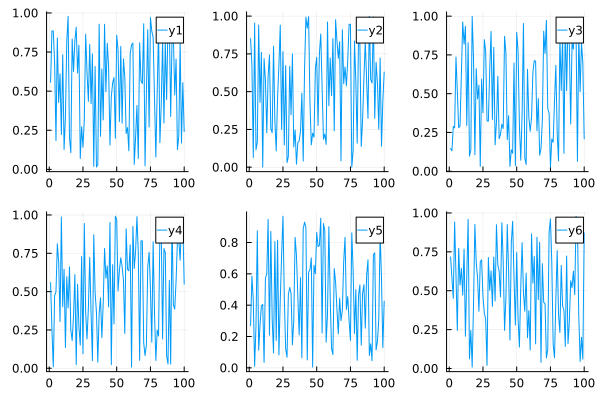

In [34]:
plot(rand(100, 6), layout = 6)

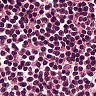

In [46]:
img = load("../input/histopathologic-cancer-detection/train/a01a119d529e936bca7e40dea7394c51e43a8ec3.tif")

In [64]:
id = Array{Image}()
for n in 1:5
    id[n] = negativos_sample[n, :id]
end

LoadError: UndefVarError: Image not defined

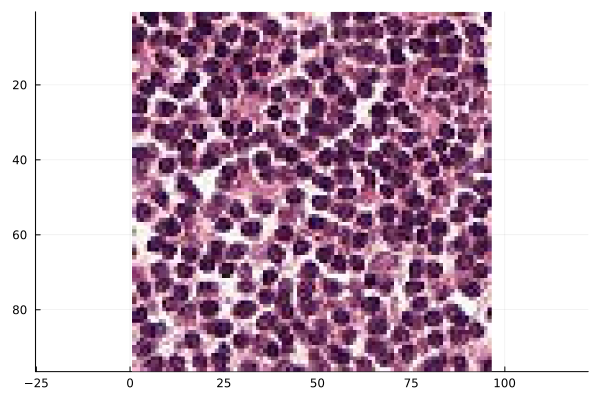

In [74]:
img1 = load("../input/histopathologic-cancer-detection/train/c2acb8393af1018c96309fa6b9ecb5676443d500.tif") 
img2 = load("../input/histopathologic-cancer-detection/train/a01a119d529e936bca7e40dea7394c51e43a8ec3.tif")
img3 = load("../input/histopathologic-cancer-detection/train/0c05539f8af193588fdb898b4029d1cdaf9ba2fb.tif")
img4 = load("../input/histopathologic-cancer-detection/train/77590f77bd3724d6db52d8fc47c291c0eae10daa.tif")
img5 = load("../input/histopathologic-cancer-detection/train/d71c4c55ffbfef6a049e3b1dfa10b0c24cef469b.tif")
plot(img1)